In [1]:
## Import Packages
import numpy as np
import _pickle as pk
import Area_Avg as aa
from matplotlib import pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

plt.rcParams['axes.xmargin'] = 0 #default margin spacing for the edges
mpl.rc('font',size=40,**{'family':'sans-serif','sans-serif':['Arial']})
%matplotlib inline

In [2]:
#load in cloud feedbacks and dimensions as needed
Models = ['4xCO2','AMIP']

data_sw = dict()
data_lw = dict()

data_sw['4xCO2'] = pk.load(open(\
            'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
data_lw['4xCO2'] = pk.load(open(\
            'Data/CanESM5_p2/Fluxes/CanESM5_p2_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))

data_sw['AMIP'] = pk.load(open(\
            'Data/CanESM5_p2/amip/Fluxes/CanESM5_p2_TrCLsw_FLUX_FB_MZdecomp_Grid.pi','rb'))
data_lw['AMIP'] = pk.load(open(\
            'Data/CanESM5_p2/amip/Fluxes/CanESM5_p2_TrCLlw_FLUX_FB_MZdecomp_Grid.pi','rb'))
    
lat = np.linspace(-87.864,87.864,64)
lon = np.linspace(0,357.1875,128)

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

In [8]:
#take the zonal, annual mean
data_lw_gam = dict()
data_sw_gam = dict()
for mods in data_sw.keys():
    data_sw_gam[mods] = dict()
    data_lw_gam[mods] = dict()
    
    for prop in data_sw[mods].keys():
        data_sw_gam[mods][prop] = dict()
        data_lw_gam[mods][prop] = dict()
        
        for ctp in data_sw[mods][prop].keys():
            data_sw_gam[mods][prop][ctp] = np.average(data_sw[mods][prop][ctp],weights=coslat)
            data_lw_gam[mods][prop][ctp] = np.average(data_lw[mods][prop][ctp],weights=coslat)

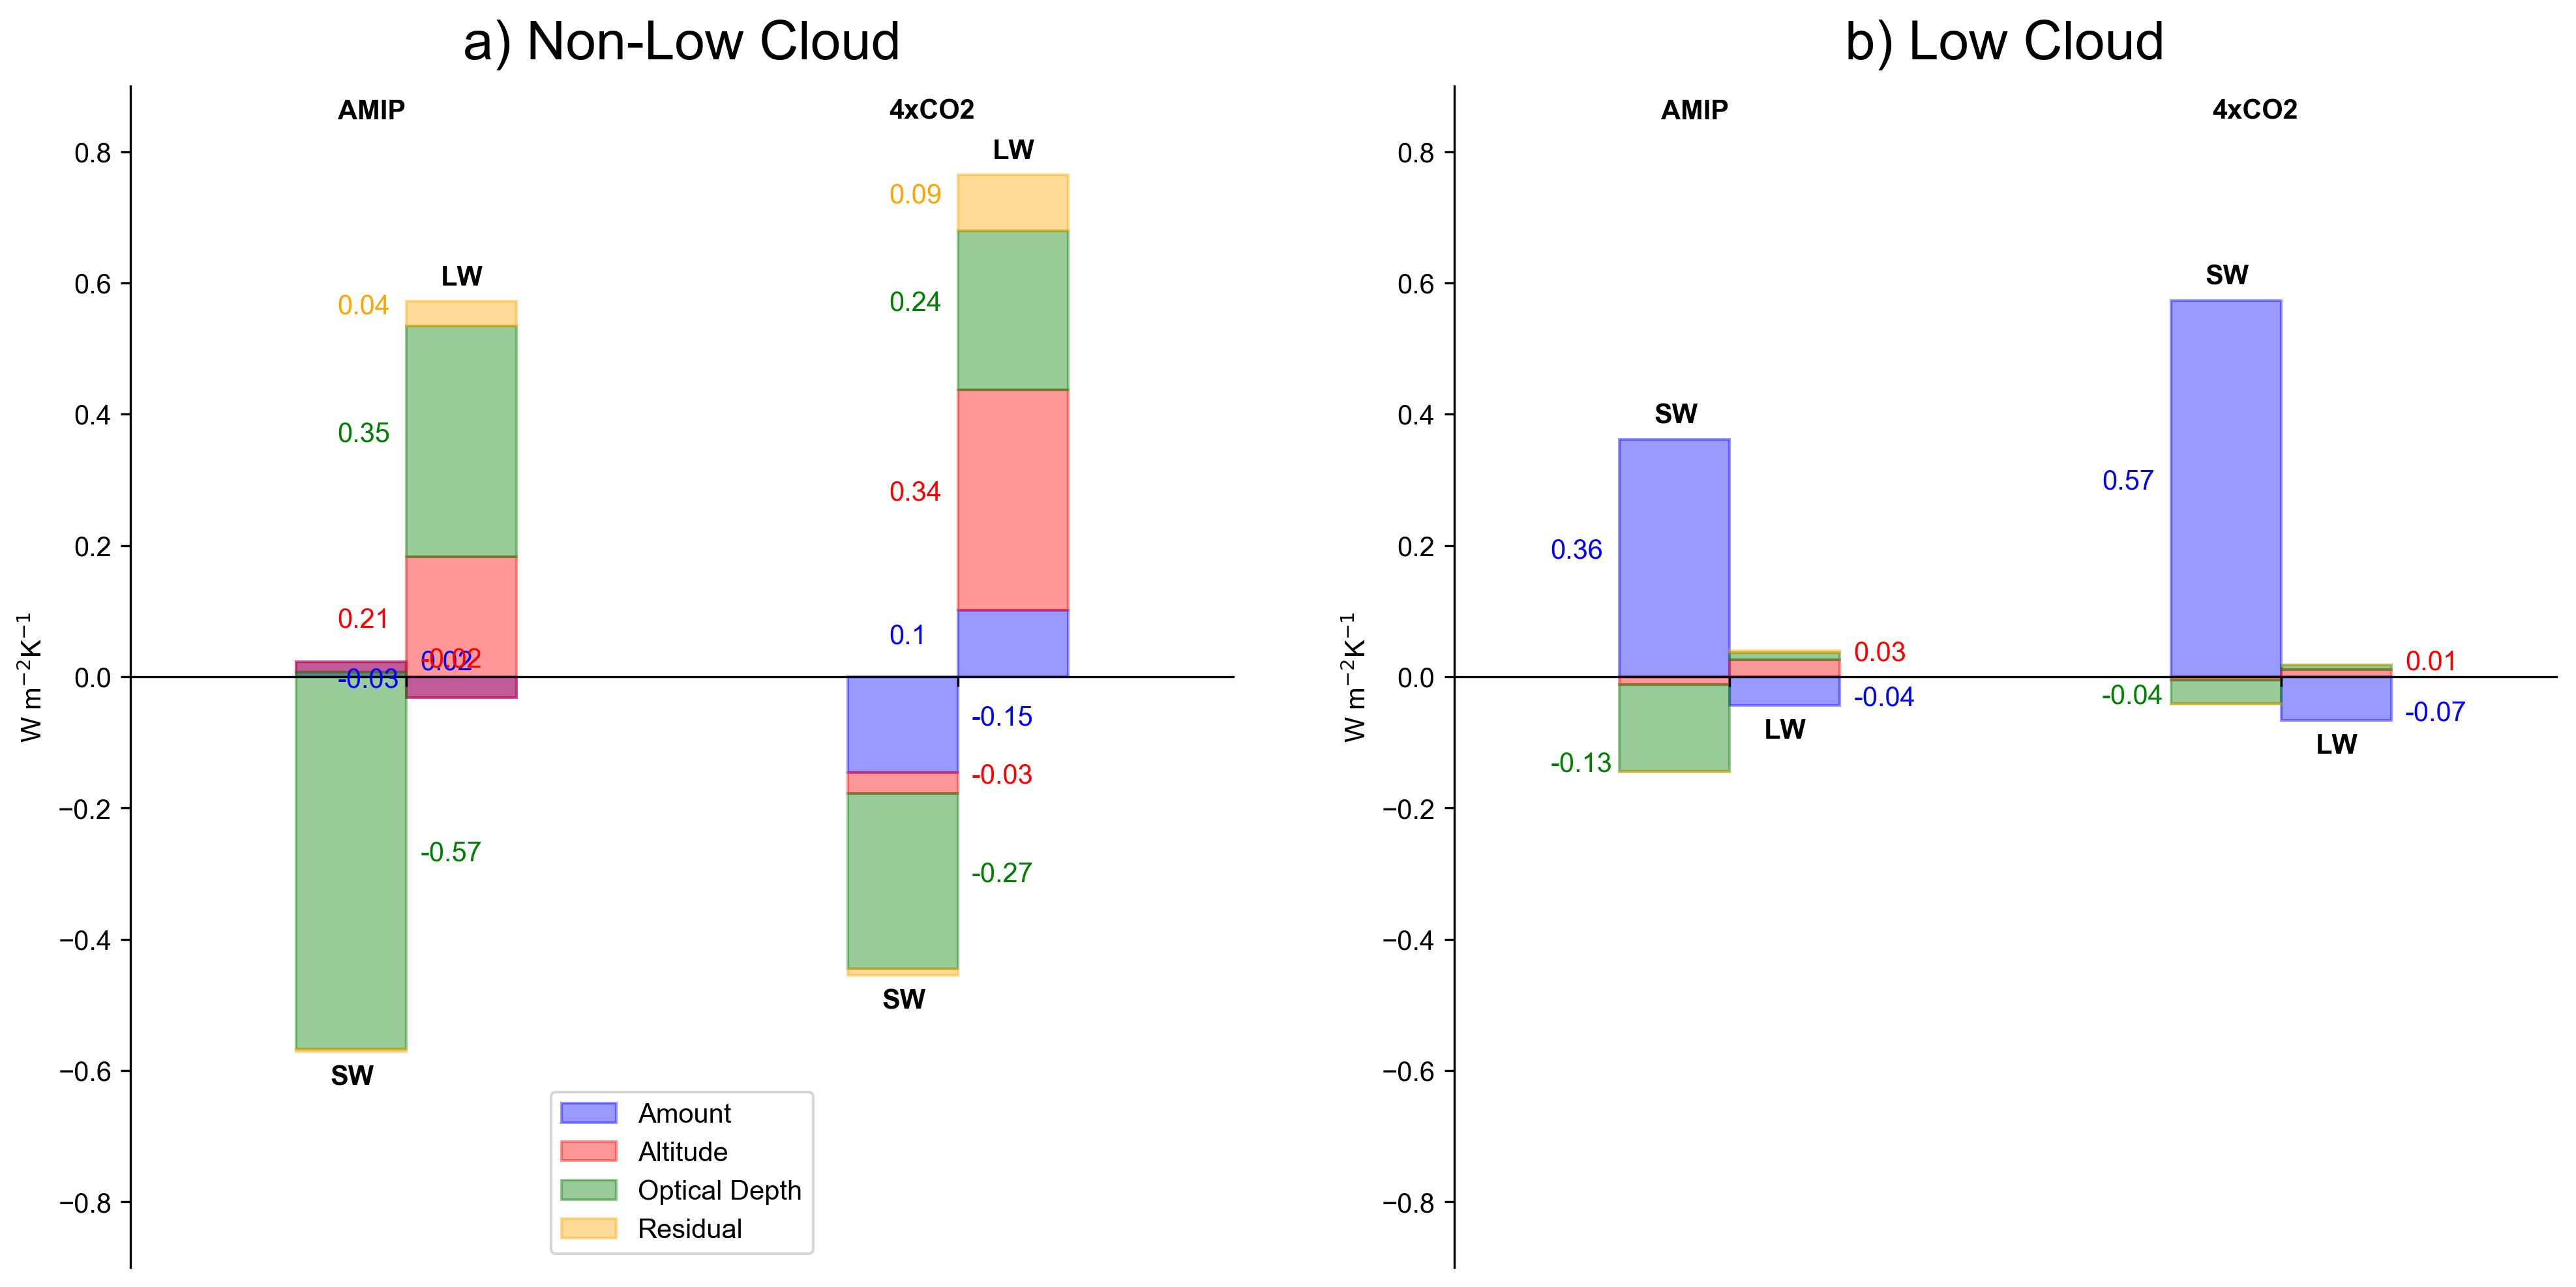

In [10]:
plt.figure(figsize=(16,8),dpi=300)
plt.subplot(121)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('a) Non-Low Cloud',fontsize=20,pad=10)

#AMIP

#amount
plt.bar(1,data_lw_gam['AMIP']['Amount']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(0.75,data_lw_gam['AMIP']['Amount']['Hi']/2,\
         str(round(data_lw_gam['AMIP']['Amount']['Hi'],2)),color='blue')
plt.bar(1,data_sw_gam['AMIP']['Amount']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(1.05,data_sw_gam['AMIP']['Amount']['Hi']/2,\
         str(round(data_sw_gam['AMIP']['Amount']['Hi'],2)),color='blue')

#altitude
plt.bar(1,data_lw_gam['AMIP']['Altitude']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['AMIP']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(0.75,data_lw_gam['AMIP']['Amount']['Hi']+(data_lw_gam['AMIP']['Altitude']['Hi']/2),\
         str(round(data_lw_gam['AMIP']['Altitude']['Hi'],2)),color='red')
plt.bar(1,data_sw_gam['AMIP']['Altitude']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['AMIP']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(1.05,data_sw_gam['AMIP']['Amount']['Hi']+(data_sw_gam['AMIP']['Altitude']['Hi']/2),\
         str(round(data_sw_gam['AMIP']['Altitude']['Hi'],2)),color='red')

#optical depth
plt.bar(1,data_lw_gam['AMIP']['Optical Depth']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['AMIP']['Altitude']['Hi']+data_lw_gam['AMIP']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
plt.text(0.75,data_lw_gam['AMIP']['Amount']['Hi']+data_lw_gam['AMIP']['Altitude']['Hi']+\
         (data_lw_gam['AMIP']['Optical Depth']['Hi']/2),\
         str(round(data_lw_gam['AMIP']['Optical Depth']['Hi'],2)),color='green')
plt.bar(1,data_sw_gam['AMIP']['Optical Depth']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['AMIP']['Altitude']['Hi']+data_sw_gam['AMIP']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(1.05,data_sw_gam['AMIP']['Amount']['Hi']+data_sw_gam['AMIP']['Altitude']['Hi']+\
         (data_sw_gam['AMIP']['Optical Depth']['Hi']/2),\
         str(round(data_sw_gam['AMIP']['Optical Depth']['Hi'],2)),color='green')

#Residual
plt.bar(1,data_lw_gam['AMIP']['Residual']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['AMIP']['Altitude']['Hi']+\
        data_lw_gam['AMIP']['Amount']['Hi']+data_lw_gam['AMIP']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
plt.text(0.75,data_lw_gam['AMIP']['Amount']['Hi']+data_lw_gam['AMIP']['Altitude']['Hi']+\
         data_lw_gam['AMIP']['Optical Depth']['Hi']+\
         (data_lw_gam['AMIP']['Residual']['Hi']/2),\
         str(round(data_lw_gam['AMIP']['Residual']['Hi'],2)),color='orange')
plt.bar(1,data_sw_gam['AMIP']['Residual']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['AMIP']['Altitude']['Hi']+\
        data_sw_gam['AMIP']['Amount']['Hi']+data_sw_gam['AMIP']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')

#4xCO2
#amount
plt.bar(3,data_lw_gam['4xCO2']['Amount']['Hi'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(2.75,data_lw_gam['4xCO2']['Amount']['Hi']/2,\
         str(round(data_lw_gam['4xCO2']['Amount']['Hi'],2)),color='blue')
plt.bar(3,data_sw_gam['4xCO2']['Amount']['Hi'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(3.05,data_sw_gam['4xCO2']['Amount']['Hi']/2,\
         str(round(data_sw_gam['4xCO2']['Amount']['Hi'],2)),color='blue')

#altitude
plt.bar(3,data_lw_gam['4xCO2']['Altitude']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['4xCO2']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(2.75,data_lw_gam['4xCO2']['Amount']['Hi']+(data_lw_gam['4xCO2']['Altitude']['Hi']/2),\
         str(round(data_lw_gam['4xCO2']['Altitude']['Hi'],2)),color='red')
plt.bar(3,data_sw_gam['4xCO2']['Altitude']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['4xCO2']['Amount']['Hi'],\
        color='red',alpha=0.4,edgecolor='red')
plt.text(3.05,data_sw_gam['4xCO2']['Amount']['Hi']+(data_sw_gam['4xCO2']['Altitude']['Hi']/2),\
         str(round(data_sw_gam['4xCO2']['Altitude']['Hi'],2)),color='red')

#optical depth
plt.bar(3,data_lw_gam['4xCO2']['Optical Depth']['Hi'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['4xCO2']['Altitude']['Hi']+data_lw_gam['4xCO2']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.75,data_lw_gam['4xCO2']['Amount']['Hi']+data_lw_gam['4xCO2']['Altitude']['Hi']+\
         (data_lw_gam['4xCO2']['Optical Depth']['Hi']/2),\
         str(round(data_lw_gam['4xCO2']['Optical Depth']['Hi'],2)),color='green')
plt.bar(3,data_sw_gam['4xCO2']['Optical Depth']['Hi'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['4xCO2']['Altitude']['Hi']+data_sw_gam['4xCO2']['Amount']['Hi'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(3.05,data_sw_gam['4xCO2']['Amount']['Hi']+data_sw_gam['4xCO2']['Altitude']['Hi']+\
         (data_sw_gam['4xCO2']['Optical Depth']['Hi']/2),\
         str(round(data_sw_gam['4xCO2']['Optical Depth']['Hi'],2)),color='green')

#Residual
plt.bar(3,data_lw_gam['4xCO2']['Residual']['Hi'],align='edge',width=0.4,\
        bottom=data_lw_gam['4xCO2']['Altitude']['Hi']+\
        data_lw_gam['4xCO2']['Amount']['Hi']+data_lw_gam['4xCO2']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
plt.text(2.75,data_lw_gam['4xCO2']['Amount']['Hi']+data_lw_gam['4xCO2']['Altitude']['Hi']+\
         data_lw_gam['4xCO2']['Optical Depth']['Hi']+\
         (data_lw_gam['4xCO2']['Residual']['Hi']/2),\
         str(round(data_lw_gam['4xCO2']['Residual']['Hi'],2)),color='orange')
plt.bar(3,data_sw_gam['4xCO2']['Residual']['Hi'],align='edge',width=-0.4,\
        bottom=data_sw_gam['4xCO2']['Altitude']['Hi']+\
        data_sw_gam['4xCO2']['Amount']['Hi']+data_sw_gam['4xCO2']['Optical Depth']['Hi'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.01,data_sw_gam['4xCO2']['Amount']['Hi']+data_sw_gam['4xCO2']['Altitude']['Hi']+\
#         data_sw_gam['4xCO2']['Optical Depth']['Hi']+\
#         (data_sw_gam['4xCO2']['Residual']['Hi']/2),\
#         str(round(data_sw_gam['4xCO2']['Residual']['Hi'],2)),color='orange')

plt.xlim(0,4)
plt.xticks([1,3],labels=['',''])
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.ylim(-0.9,0.9);
plt.legend(loc='lower center')

plt.text(0.75, 0.85, 'AMIP', color='k', fontweight='bold')
#plt.text(1.75, 0.85, '4xCO2-D', color='k', fontweight='bold')
plt.text(2.75, 0.85, '4xCO2', color='k', fontweight='bold')
plt.text(0.725,data_sw_gam['AMIP']['Sum']['Hi']-0.05,'SW',color='k',fontweight='bold')
plt.text(1.125,data_lw_gam['AMIP']['Sum']['Hi']+0.025,'LW',color='k',fontweight='bold')

plt.text(2.725,data_sw_gam['4xCO2']['Sum']['Hi']-0.05,'SW',color='k',fontweight='bold')
plt.text(3.125,data_lw_gam['4xCO2']['Sum']['Hi']+0.025,'LW',color='k',fontweight='bold')

#plt.axhline(0,color='k')
#------------
#SHORTWAVE
#------------
plt.subplot(122)
plt.gca().spines['bottom'].set_position(('data',0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('b) Low Cloud',fontsize=20,pad=10)

#amount
plt.bar(1,data_lw_gam['AMIP']['Amount']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(1.45,data_lw_gam['AMIP']['Amount']['Low'],\
         str(round(data_lw_gam['AMIP']['Amount']['Low'],2)),color='blue')
plt.bar(1,data_sw_gam['AMIP']['Amount']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(0.35,data_sw_gam['AMIP']['Amount']['Low']/2,\
         str(round(data_sw_gam['AMIP']['Amount']['Low'],2)),color='blue')

#altitude
plt.bar(1,data_lw_gam['AMIP']['Altitude']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(1.45,data_lw_gam['AMIP']['Altitude']['Low'],\
         str(round(data_lw_gam['AMIP']['Altitude']['Low'],2)),color='red')
plt.bar(1,data_sw_gam['AMIP']['Altitude']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(0.35,-0.04,\
#         str(round(data_sw_gam['AMIP']['Altitude']['Low']/2,2)),color='red')

#optical depth
plt.bar(1,data_lw_gam['AMIP']['Optical Depth']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['AMIP']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
#plt.text(1.45,0.07,\
#         str(round(data_lw_gam['AMIP']['Optical Depth']['Low'],2)),color='green')
plt.bar(1,data_sw_gam['AMIP']['Optical Depth']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['AMIP']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(0.35,data_sw_gam['AMIP']['Altitude']['Low']+\
         (data_sw_gam['AMIP']['Optical Depth']['Low']),\
         str(round(data_sw_gam['AMIP']['Optical Depth']['Low'],2)),color='green')

#Residual
plt.bar(1,data_lw_gam['AMIP']['Residual']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['AMIP']['Altitude']['Low']+\
        data_lw_gam['AMIP']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
#plt.text(1.45,0.12,\
#         str(round(data_lw_gam['AMIP']['Residual']['Low'],2)),color='orange')
plt.bar(1,data_sw_gam['AMIP']['Residual']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['AMIP']['Altitude']['Low']+\
        data_sw_gam['AMIP']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#4xCO2
#amount
plt.bar(3,data_lw_gam['4xCO2']['Amount']['Low'],align='edge',width=0.4,color='blue',\
        alpha=0.4,edgecolor='blue',label='Amount')
plt.text(3.45,data_lw_gam['4xCO2']['Amount']['Low'],\
         str(round(data_lw_gam['4xCO2']['Amount']['Low'],2)),color='blue')
plt.bar(3,data_sw_gam['4xCO2']['Amount']['Low'],align='edge',width=-0.4,color='blue',\
        alpha=0.4,edgecolor='blue')
plt.text(2.35,data_sw_gam['4xCO2']['Amount']['Low']/2,\
         str(round(data_sw_gam['4xCO2']['Amount']['Low'],2)),color='blue')

#altitude
plt.bar(3,data_lw_gam['4xCO2']['Altitude']['Low'],align='edge',width=0.4,\
        color='red',alpha=0.4,edgecolor='red',label='Altitude')
plt.text(3.45,data_lw_gam['4xCO2']['Altitude']['Low'],\
         str(round(data_lw_gam['4xCO2']['Altitude']['Low'],2)),color='red')
plt.bar(3,data_sw_gam['4xCO2']['Altitude']['Low'],align='edge',width=-0.4,\
        color='red',alpha=0.4,edgecolor='red')
#plt.text(2.35,-0.04,\
#         str(round(data_sw_gam['4xCO2']['Altitude']['Low']/2,2)),color='red')

#optical depth
plt.bar(3,data_lw_gam['4xCO2']['Optical Depth']['Low'],align='edge',width=0.4,\
        bottom=\
    data_lw_gam['4xCO2']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green',label='Optical Depth')
#plt.text(3.45,0.07,\
#         str(round(data_lw_gam['4xCO2']['Optical Depth']['Low'],2)),color='green')
plt.bar(3,data_sw_gam['4xCO2']['Optical Depth']['Low'],align='edge',width=-0.4,\
        bottom=\
    data_sw_gam['4xCO2']['Altitude']['Low'],\
        color='green',alpha=0.4,edgecolor='green')
plt.text(2.35,data_sw_gam['4xCO2']['Altitude']['Low']+\
         (data_sw_gam['4xCO2']['Optical Depth']['Low']),\
         str(round(data_sw_gam['4xCO2']['Optical Depth']['Low'],2)),color='green')

#Residual
plt.bar(3,data_lw_gam['4xCO2']['Residual']['Low'],align='edge',width=0.4,\
        bottom=data_lw_gam['4xCO2']['Altitude']['Low']+\
        data_lw_gam['4xCO2']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange',label='Residual')
#plt.text(3.45,0.12,\
#         str(round(data_lw_gam['4xCO2']['Residual']['Low'],2)),color='orange')
plt.bar(3,data_sw_gam['4xCO2']['Residual']['Low'],align='edge',width=-0.4,\
        bottom=data_sw_gam['4xCO2']['Altitude']['Low']+\
        data_sw_gam['4xCO2']['Optical Depth']['Low'],\
        color='orange',alpha=0.4,edgecolor='orange')
#plt.text(3.35,-0.13,\
#         str(round(data_sw_gam['4xCO2']['Residual']['Low'],2)),color='orange')

plt.xlim(0,4)
plt.xticks([1,3],labels=['',''])
plt.ylabel('W m$^{-2}$K$^{-1}$')
plt.ylim(-0.9,0.9)
#plt.axhline(0,color='k')

plt.text(0.75, 0.85, 'AMIP', color='k', fontweight='bold')
#plt.text(1.75, 0.85, '4xCO2-D', color='k', fontweight='bold')
plt.text(2.75, 0.85, '4xCO2', color='k', fontweight='bold')

plt.text(0.725,data_sw_gam['AMIP']['Amount']['Low']+0.025,'SW',color='k',fontweight='bold')
plt.text(1.125,data_lw_gam['AMIP']['Amount']['Low']-0.05,'LW',color='k',fontweight='bold')

plt.text(2.725,data_sw_gam['4xCO2']['Amount']['Low']+0.025,'SW',color='k',fontweight='bold')
plt.text(3.125,data_lw_gam['4xCO2']['Amount']['Low']-0.05,'LW',color='k',fontweight='bold');

plt.savefig('CLD_FB_Decomp_GAM_Bar_amip.png',bbox_inches='tight')